# Red Wine Quality Prediction

Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.



In [103]:
import pandas as pd
import numpy as np

In [104]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df=pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [105]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [106]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [107]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [108]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Visualization of DataSet

In [109]:
import seaborn as sns

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

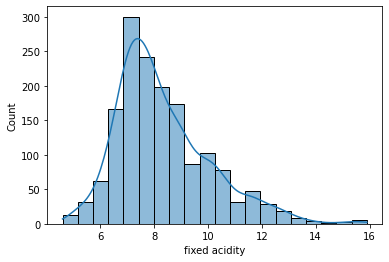

In [110]:
sns.histplot(x='fixed acidity',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

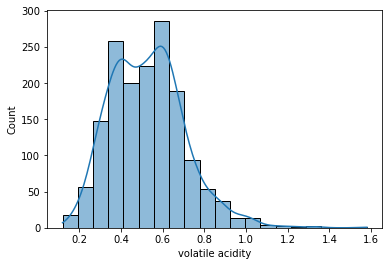

In [111]:
sns.histplot(x='volatile acidity',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

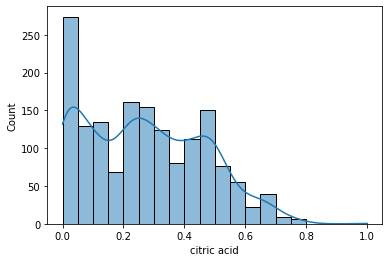

In [112]:
sns.histplot(x='citric acid',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

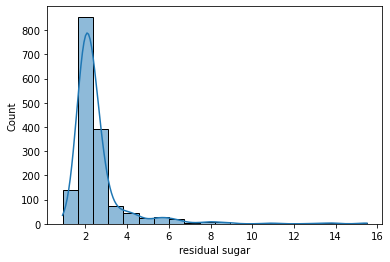

In [113]:
sns.histplot(x='residual sugar',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

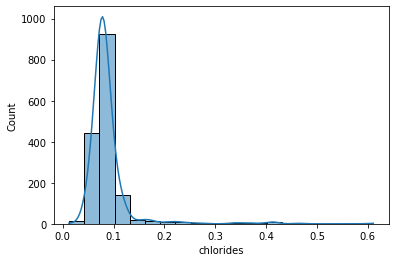

In [114]:
sns.histplot(x='chlorides',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

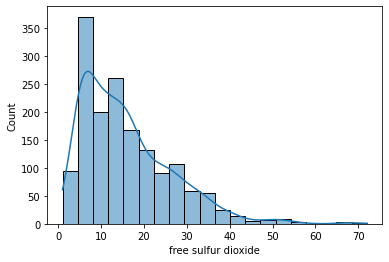

In [115]:
sns.histplot(x='free sulfur dioxide',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

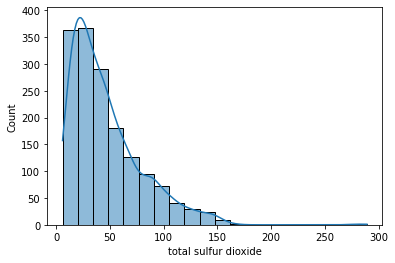

In [116]:
sns.histplot(x='total sulfur dioxide',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='density', ylabel='Count'>

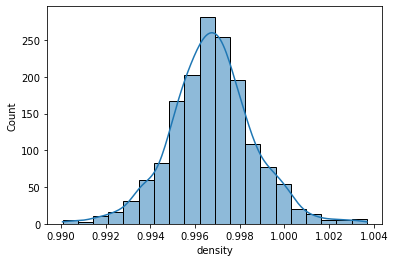

In [117]:
sns.histplot(x='density',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='pH', ylabel='Count'>

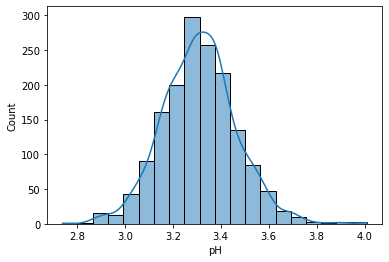

In [118]:
sns.histplot(x='pH',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

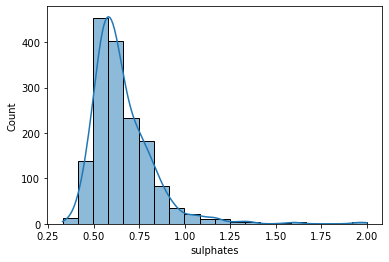

In [119]:
sns.histplot(x='sulphates',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

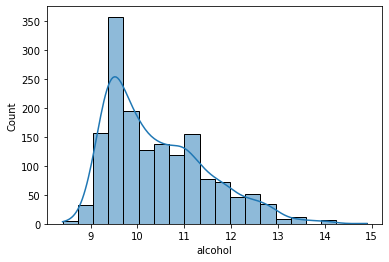

In [120]:
sns.histplot(x='alcohol',bins=20,kde=True,data=df)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


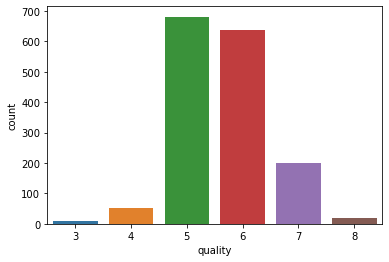

In [121]:
sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

# Describing Data

In [122]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [123]:
import matplotlib.pyplot as plt

<AxesSubplot:>

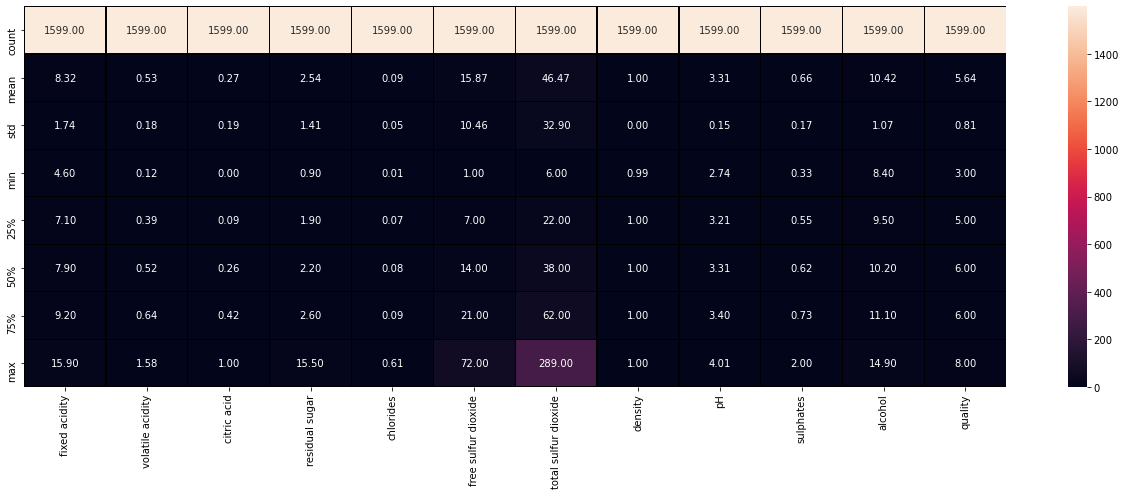

In [124]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f')

# Correlation

In [125]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


No multicollinearity

<AxesSubplot:>

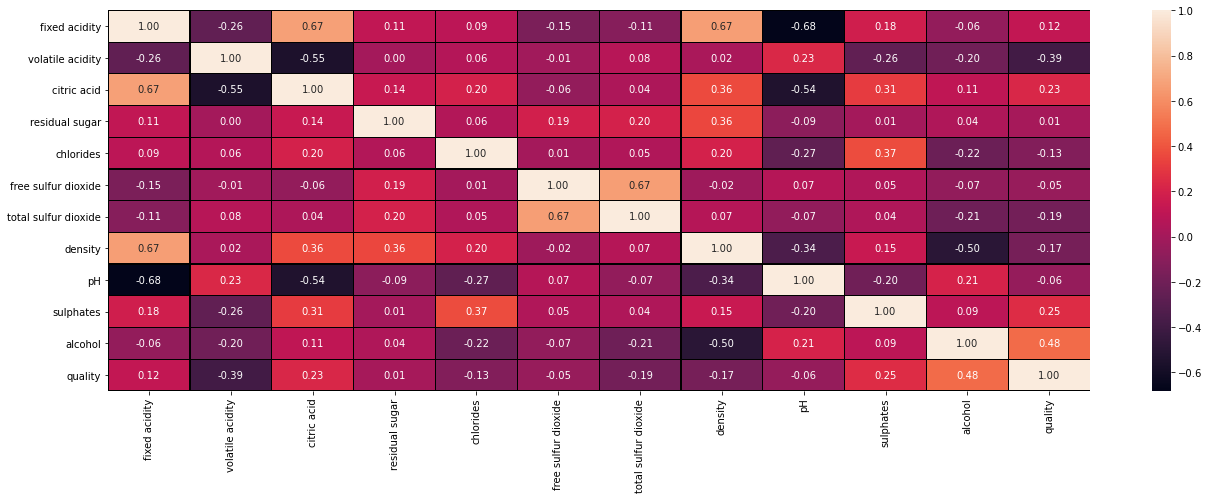

In [126]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=0.2,fmt='0.2f')

In [127]:
import itertools
import warnings
warnings.filterwarnings('ignore')

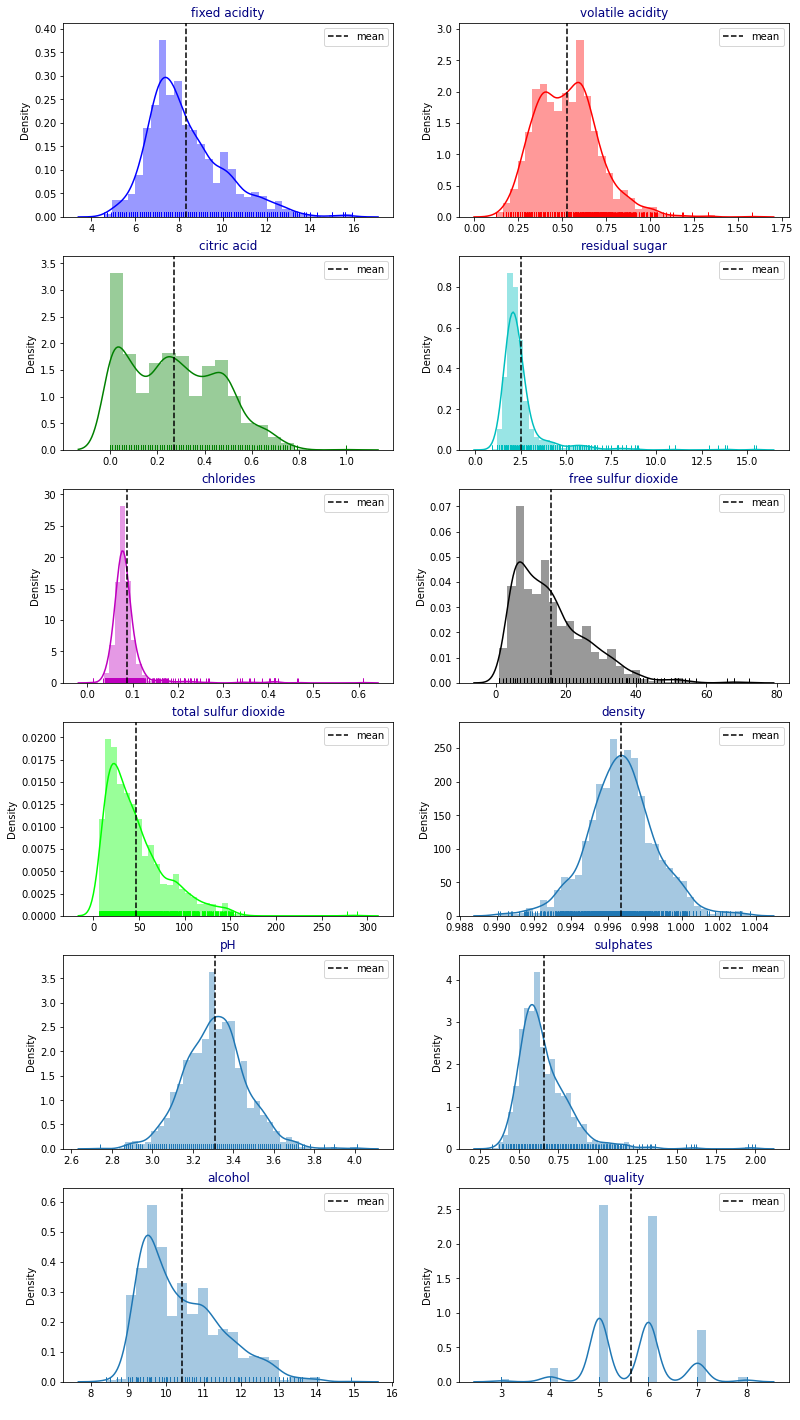

In [128]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
     'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel(" ")

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

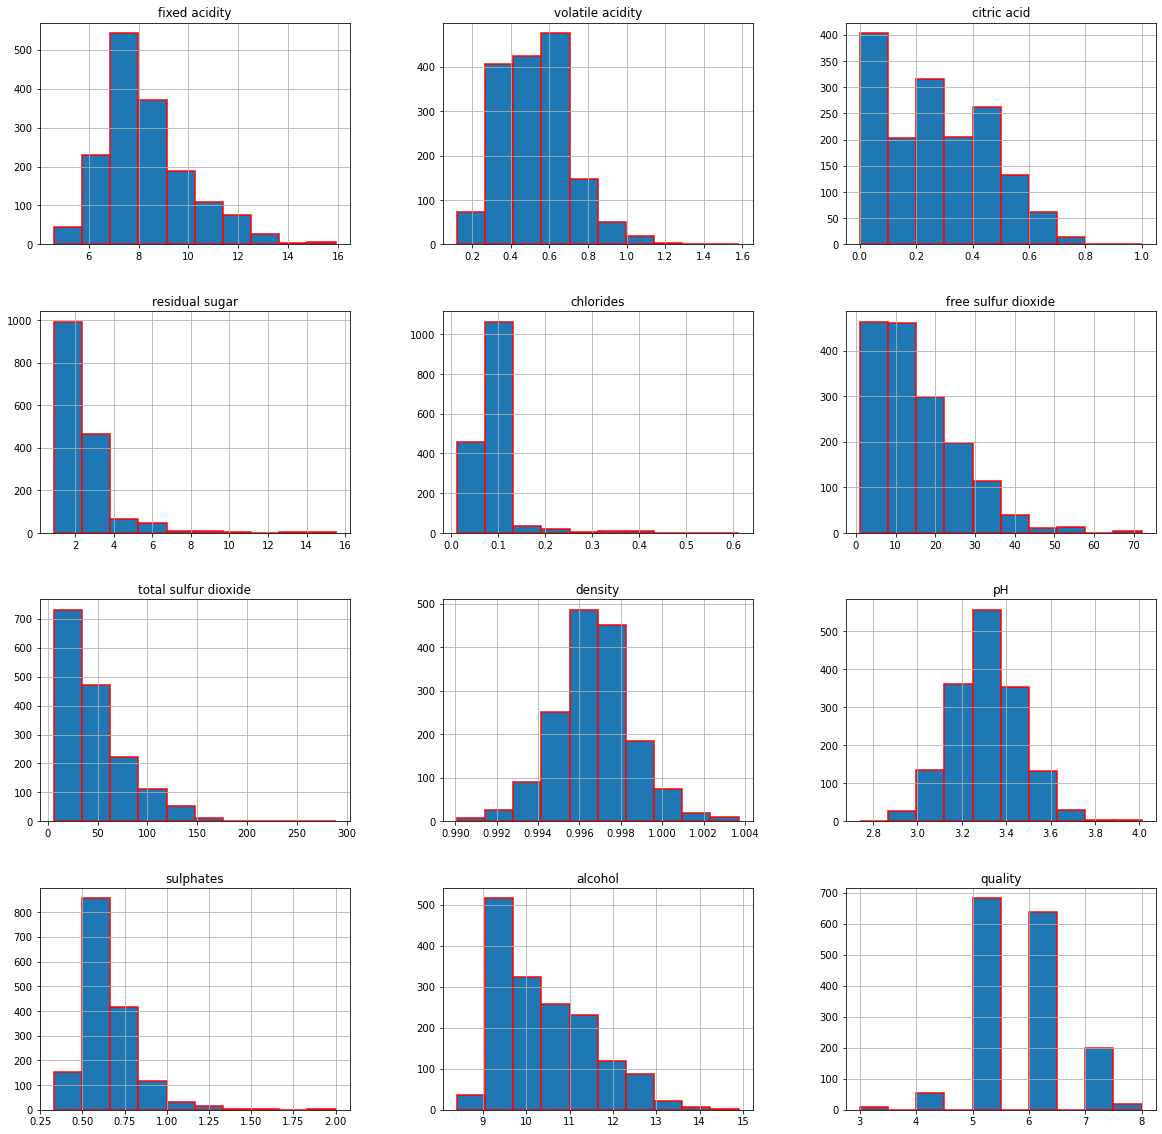

In [129]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

# Outliers Checking

In [130]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

-/+ 0.5 is the threshold

The above are not in the threshold so, using boxplot to check outliers

<AxesSubplot:>

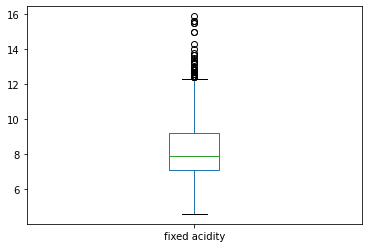

In [131]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

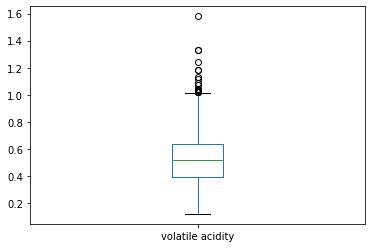

In [132]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

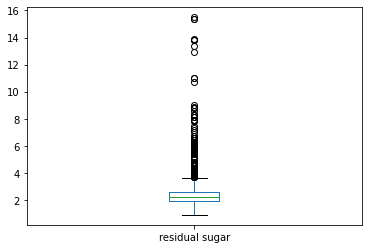

In [133]:
df['residual sugar'].plot.box()

<AxesSubplot:>

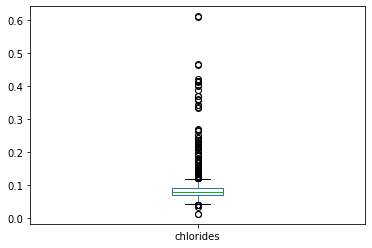

In [134]:
df['chlorides'].plot.box()

<AxesSubplot:>

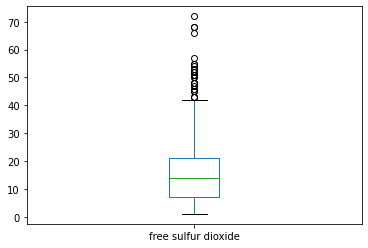

In [135]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

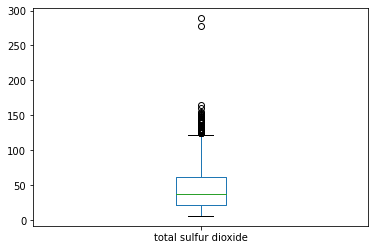

In [136]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

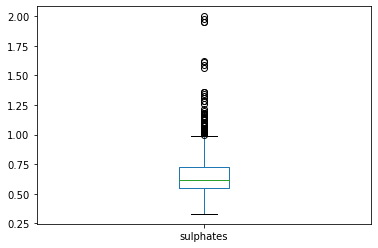

In [137]:
df['sulphates'].plot.box()

<AxesSubplot:>

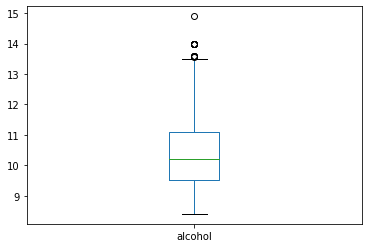

In [138]:
df['alcohol'].plot.box()

# Removing outliers

In [139]:
df.shape

(1599, 12)

In [140]:
from scipy.stats import zscore
import numpy as np

In [141]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [142]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Percentage Dataloss

In [143]:
Data_loss=((1599-1451)/1599)*100
Data_loss

9.255784865540964

Using IQR

In [144]:
#Q1=df.quantile(0.25)
#Q3=df.quantile(0.75)
#IQR=Q3-Q1
#print(IQR)

In [145]:
#df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
#df_new1

In [146]:
#Data_loss1=((1599-1179)/1599)*100
#Data_loss1

Since Data loss in IQR is more So we will take zscore method

# Separating Data in x and y

In [147]:
x=df.drop('quality',axis=1)
y=df['quality']

# Transforming Data

In [148]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517443e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054090e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868608e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831604e-01,  2.56369273e-01,  7.34557526e-01]])

# Scaling Data

In [149]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.48201046, 0.58073177, 0.        , ..., 0.65232477, 0.49283893,
        0.36499451],
       [0.52716029, 0.69469952, 0.        , ..., 0.40931369, 0.63391688,
        0.46972934],
       [0.52716029, 0.62102372, 0.06279699, ..., 0.45821238, 0.6033889 ,
        0.46972934],
       ...,
       [0.3341041 , 0.43453199, 0.19307392, ..., 0.58416378, 0.69540105,
        0.69508446],
       [0.26941968, 0.54150801, 0.17928878, ..., 0.6967484 , 0.66182136,
        0.55766291],
       [0.28624002, 0.24048441, 0.58348786, ..., 0.56102358, 0.6138742 ,
        0.69508446]])

# Model Selection

In [150]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [151]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)

At random state 27 The model performs very well
At random state :- 27
Training accuracy_score is :- 60.90695856137608
Testing accuracy_score is :- 60.9375
At random state 80 The model performs very well
At random state :- 80
Training accuracy_score is :- 60.046911649726354
Testing accuracy_score is :- 60.0
At random state 318 The model performs very well
At random state :- 318
Training accuracy_score is :- 60.046911649726354
Testing accuracy_score is :- 60.0
At random state 435 The model performs very well
At random state :- 435
Training accuracy_score is :- 59.9687255668491
Testing accuracy_score is :- 60.0
At random state 455 The model performs very well
At random state :- 455
Training accuracy_score is :- 60.046911649726354
Testing accuracy_score is :- 60.0
At random state 570 The model performs very well
At random state :- 570
Training accuracy_score is :- 59.9687255668491
Testing accuracy_score is :- 60.0
At random state 614 The model performs very well
At random state :- 614
Trai

In [152]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [153]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)

At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 106 The model performs very well
At random state :- 106
Training accuracy_score is :- 39.95308835027365
Testing accuracy_score is :- 40.0
At random state 170 The model performs very well
At random state :- 170
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 190 The model performs very well
At random state :- 190
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 222 The model performs very well
At random state :- 222
Training accuracy_score is :- 40.26583268178264
Testing accuracy_score is :- 40.3125
At random state 458 The model performs very well
At random state :- 458
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 467 The model performs very well
At random stat

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)


At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 106 The model performs very well
At random state :- 106
Training accuracy_score is :- 39.95308835027365
Testing accuracy_score is :- 40.0
At random state 170 The model performs very well
At random state :- 170
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 190 The model performs very well
At random state :- 190
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 222 The model performs very well
At random state :- 222
Training accuracy_score is :- 40.26583268178264
Testing accuracy_score is :- 40.3125
At random state 458 The model performs very well
At random state :- 458
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 467 The model performs very well
At random stat

In [156]:
from sklearn.naive_bayes import MultinomialNB

In [157]:
mnb=MultinomialNB()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    predmnb_train=mnb.predict(x_train)
    predmnb_test=mnb.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)


At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 106 The model performs very well
At random state :- 106
Training accuracy_score is :- 39.95308835027365
Testing accuracy_score is :- 40.0
At random state 170 The model performs very well
At random state :- 170
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 190 The model performs very well
At random state :- 190
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 222 The model performs very well
At random state :- 222
Training accuracy_score is :- 40.26583268178264
Testing accuracy_score is :- 40.3125
At random state 458 The model performs very well
At random state :- 458
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 467 The model performs very well
At random stat

In [158]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svc.fit(x_train,y_train)
    predsvc_train=svc.predict(x_train)
    predsvc_test=svc.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)


At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 106 The model performs very well
At random state :- 106
Training accuracy_score is :- 39.95308835027365
Testing accuracy_score is :- 40.0
At random state 170 The model performs very well
At random state :- 170
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 190 The model performs very well
At random state :- 190
Training accuracy_score is :- 38.38936669272869
Testing accuracy_score is :- 38.4375
At random state 222 The model performs very well
At random state :- 222
Training accuracy_score is :- 40.26583268178264
Testing accuracy_score is :- 40.3125
At random state 458 The model performs very well
At random state :- 458
Training accuracy_score is :- 39.71853010164191
Testing accuracy_score is :- 39.6875
At random state 467 The model performs very well
At random stat

# Cross validation

In [159]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 57.851142052565706
accuracy_score is :- 60.0


At cv :-  3
Cross validation score is :- 57.911194496560356
accuracy_score is :- 60.0


At cv :-  4
Cross validation score is :- 57.72509398496241
accuracy_score is :- 60.0


At cv :-  5
Cross validation score is :- 58.16183385579937
accuracy_score is :- 60.0


At cv :-  6
Cross validation score is :- 58.10406165225799
accuracy_score is :- 60.0


At cv :-  7
Cross validation score is :- 58.5437392608158
accuracy_score is :- 60.0


At cv :-  8
Cross validation score is :- 58.47204773869347
accuracy_score is :- 60.0


At cv :-  9
Cross validation score is :- 58.16352440804925
accuracy_score is :- 60.0




In [160]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)

The cv score is:  0.5785114205256571 
 The accuracy_score is:  0.6


# Model Saving

In [162]:
import pickle
filename='RedWine.pk1'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [163]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com
                    

,original,predicted
0,5,6
1,5,6
2,7,5
3,7,6
4,5,5
...,...,...
315,5,5
316,6,5
317,5,6
318,5,5
